In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [2]:
data = pd.read_csv('auto-mpg.csv')

In [3]:
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
data = data.drop(columns = 'car name')

In [5]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [6]:
data['origin'] = data['origin'].map({1 : 'USA', 2 : 'EUROPE',3: 'JAPAN'})

In [7]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,USA
394,44.0,4,97.0,52,2130,24.6,82,EUROPE
395,32.0,4,135.0,84,2295,11.6,82,USA
396,28.0,4,120.0,79,2625,18.6,82,USA


In [8]:
data = pd.get_dummies(data, columns = ['origin'])

In [9]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_EUROPE,origin_JAPAN,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,False,False,True
1,15.0,8,350.0,165,3693,11.5,70,False,False,True
2,18.0,8,318.0,150,3436,11.0,70,False,False,True
3,16.0,8,304.0,150,3433,12.0,70,False,False,True
4,17.0,8,302.0,140,3449,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,False,False,True
394,44.0,4,97.0,52,2130,24.6,82,True,False,False
395,32.0,4,135.0,84,2295,11.6,82,False,False,True
396,28.0,4,120.0,79,2625,18.6,82,False,False,True


In [10]:
data.isna().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model year       0
origin_EUROPE    0
origin_JAPAN     0
origin_USA       0
dtype: int64

In [11]:
data = data.dropna()

In [12]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model year     398 non-null    int64  
 7   origin_EUROPE  398 non-null    bool   
 8   origin_JAPAN   398 non-null    bool   
 9   origin_USA     398 non-null    bool   
dtypes: bool(3), float64(3), int64(3), object(1)
memory usage: 23.1+ KB


In [14]:
X = data.drop(columns = ['mpg'])
y = data['mpg']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 9), (80, 9), (318,), (80,))

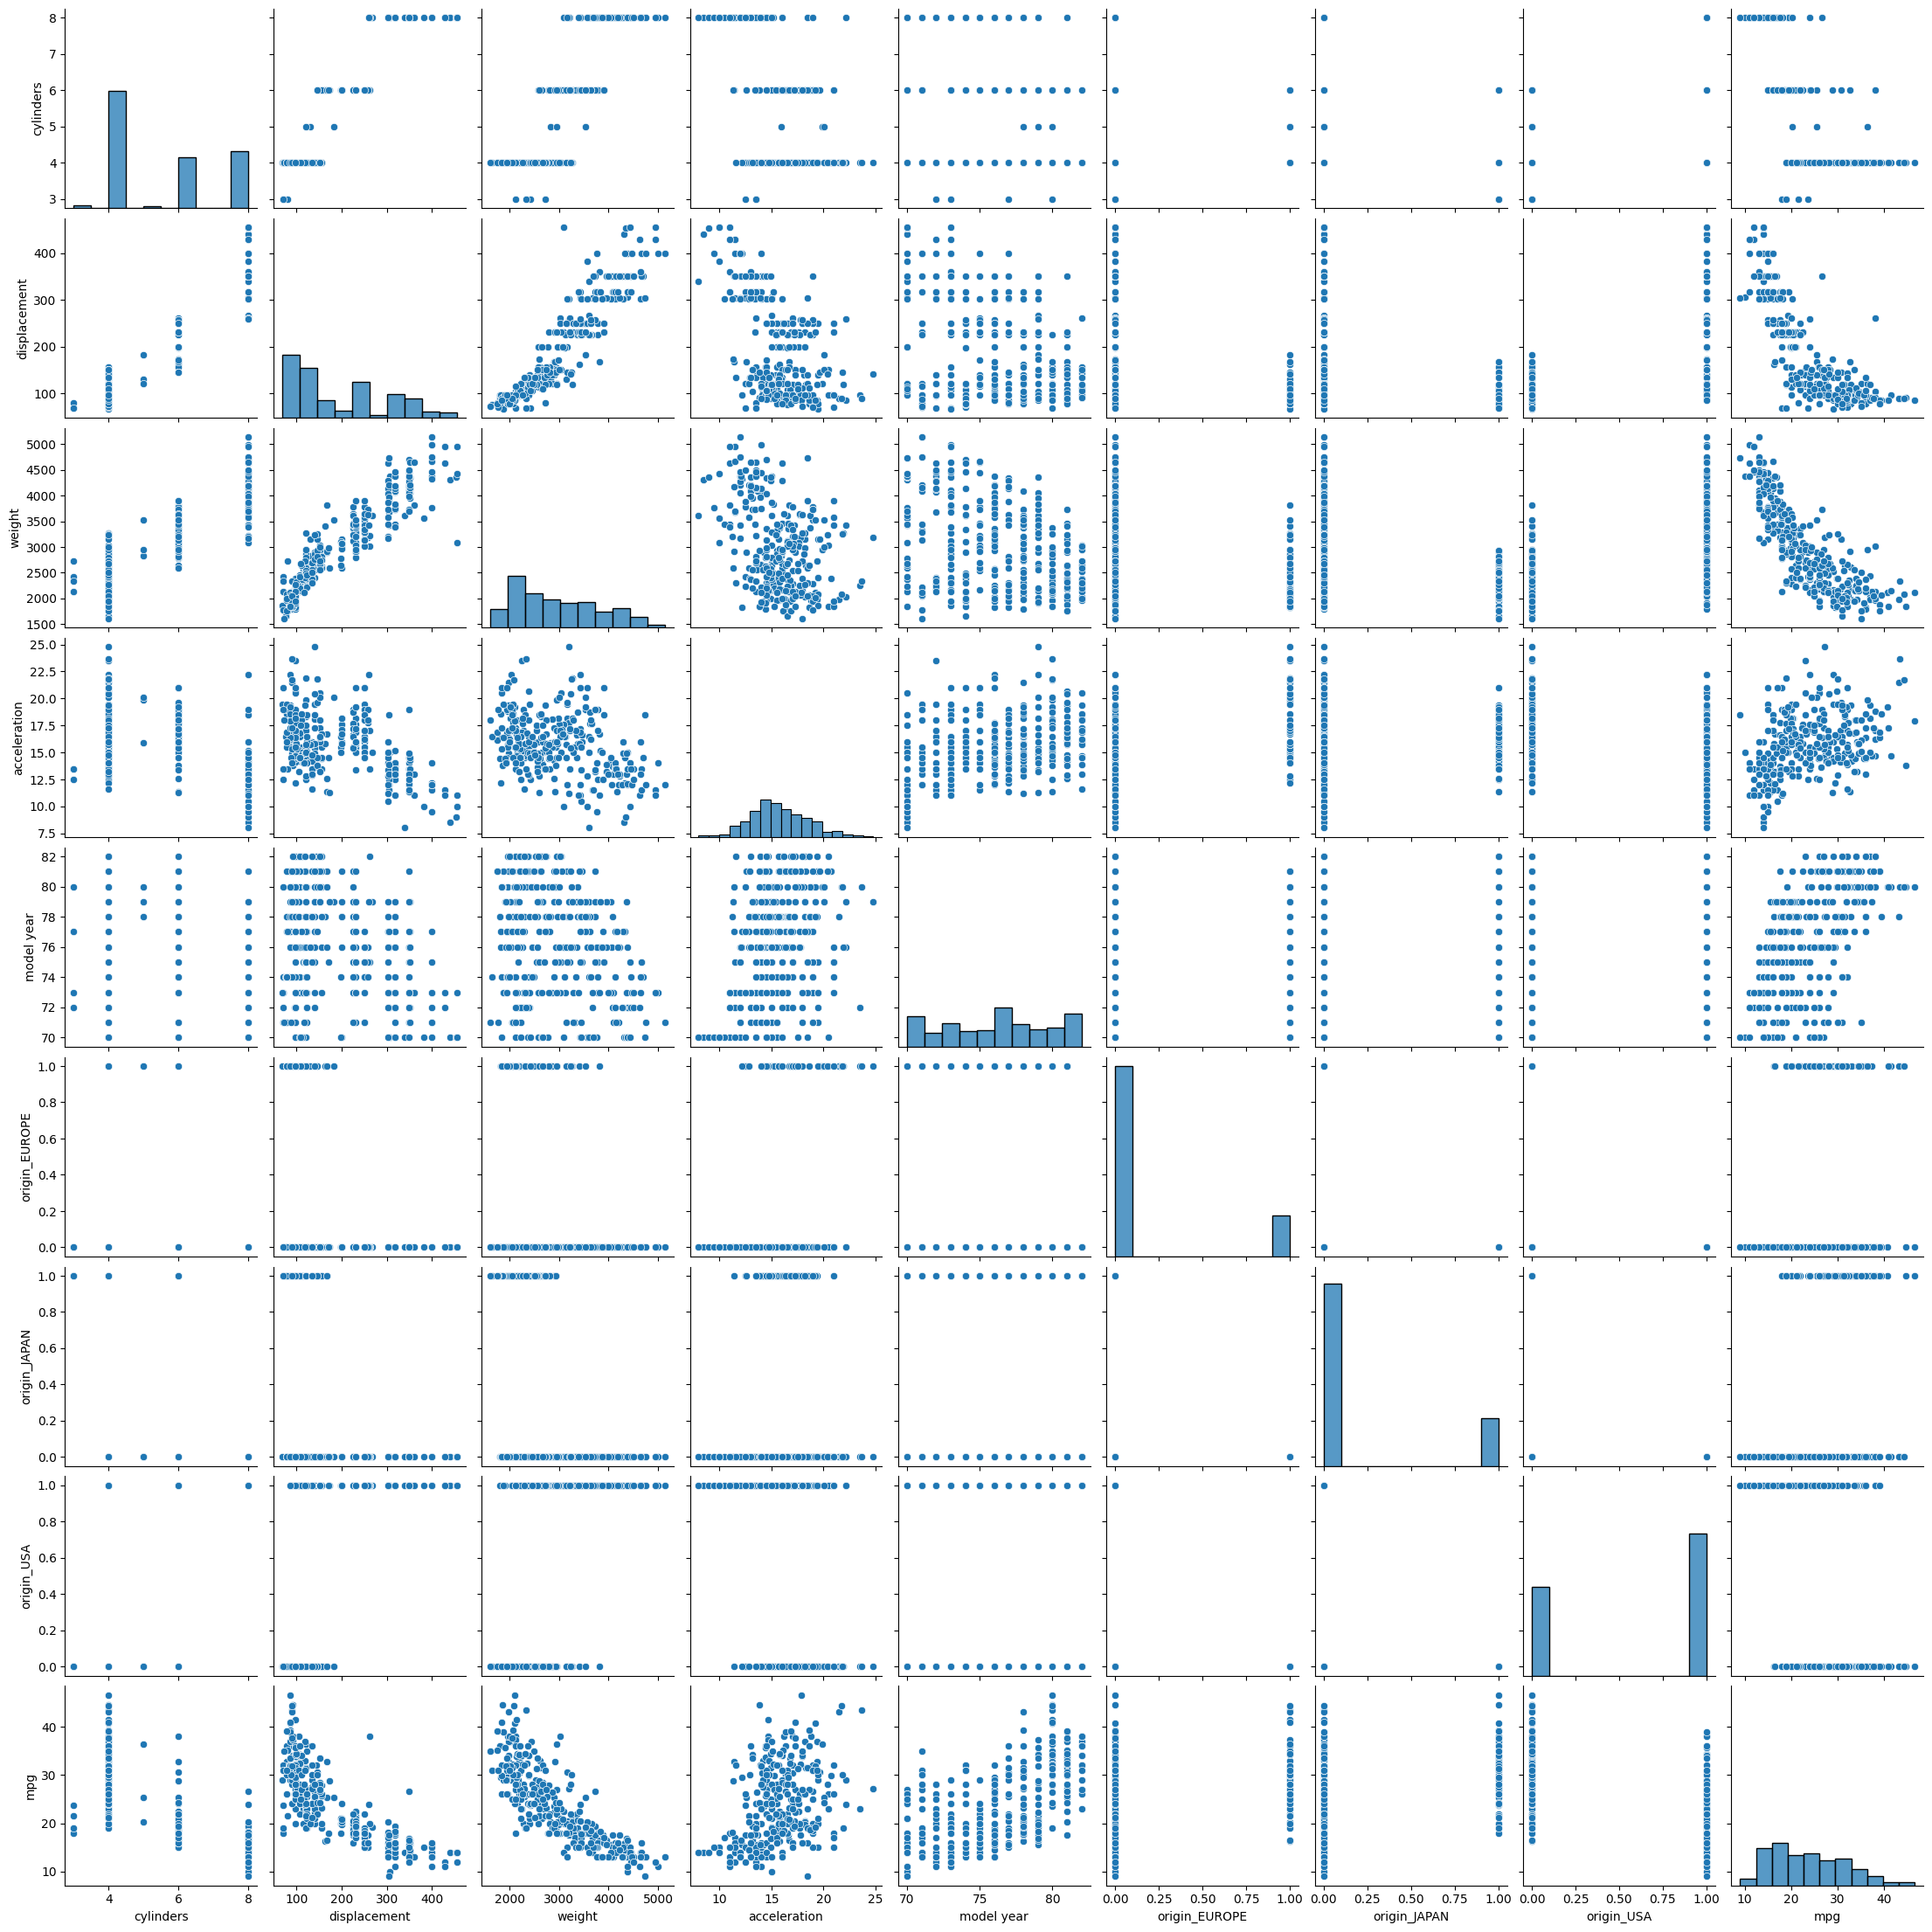

In [17]:
train_data = X_train.copy()
train_data['mpg'] = y_train

sns.pairplot(train_data)
plt.show()

In [18]:
X_train.dtypes

cylinders          int64
displacement     float64
horsepower        object
weight             int64
acceleration     float64
model year         int64
origin_EUROPE       bool
origin_JAPAN        bool
origin_USA          bool
dtype: object

In [19]:
data.isna().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model year       0
origin_EUROPE    0
origin_JAPAN     0
origin_USA       0
dtype: int64

In [20]:
import numpy as np
import pandas as pd

# Replace '?' with NaN
X_train['horsepower'].replace('?', np.nan, inplace=True)
X_test['horsepower'].replace('?', np.nan, inplace=True)

# Convert to numeric (forcing conversion)
X_train['horsepower'] = pd.to_numeric(X_train['horsepower'], errors='coerce')
X_test['horsepower'] = pd.to_numeric(X_test['horsepower'], errors='coerce')


C:\Users\hp\AppData\Local\Temp\ipykernel_24692\2236054650.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['horsepower'].replace('?', np.nan, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_24692\2236054650.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [21]:
X_train['horsepower'].fillna(X_train['horsepower'].mean(), inplace=True)
X_test['horsepower'].fillna(X_test['horsepower'].mean(), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_24692\2636680197.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['horsepower'].fillna(X_train['horsepower'].mean(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_24692\2636680197.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation = 'relu',kernel_regularizer=l2(0.01), input_shape = ((X_train.shape[1],))))
    model.add(Dense(32, activation = 'relu',kernel_regularizer=l2(0.01)))
    model.add(Dense(1))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    return model
    

In [24]:
model = build_model()

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(X_train_scaled, y_train,batch_size = 32, epochs = 50)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 616.2408  
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 584.3608 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 581.1033 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 556.1304 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 499.1981 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 485.7178 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 433.2509 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 398.7640 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 324.1483 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 240.8451 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 178.1208 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.4765 
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.9595 
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.3430 
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

In [27]:
Predictions = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [28]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [29]:
mean_squared_error(y_test, Predictions)

5.4138346788616865

In [30]:
root_mean_squared_error(y_test, Predictions)

2.3267648525069493

In [31]:
Predictions

array([[32.847527],
       [31.175432],
       [19.30903 ],
       [15.255074],
       [13.726721],
       [25.819477],
       [28.124035],
       [12.638432],
       [17.564106],
       [16.85312 ],
       [15.063082],
       [37.75161 ],
       [27.0084  ],
       [14.386389],
       [23.172302],
       [12.647797],
       [31.528202],
       [20.21754 ],
       [15.43931 ],
       [37.816742],
       [23.049969],
       [18.158693],
       [24.790174],
       [29.067951],
       [16.38778 ],
       [42.804993],
       [24.929111],
       [22.890472],
       [17.017435],
       [13.315836],
       [29.596392],
       [38.14992 ],
       [18.289356],
       [23.687443],
       [35.176888],
       [12.916727],
       [19.51575 ],
       [17.367006],
       [14.130163],
       [26.22669 ],
       [22.459347],
       [28.018848],
       [19.590866],
       [10.930645],
       [21.809351],
       [34.648277],
       [26.369251],
       [23.009083],
       [22.290718],
       [28.224716],


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.8713 - val_loss: 6.2016
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.3909 - val_loss: 6.2036
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.2667 - val_loss: 6.1295
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.1089 - val_loss: 6.0905
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1275 - val_loss: 6.1038
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7672 - val_loss: 5.9349
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5441 - val_loss: 5.9402
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7351 - val_loss: 5.9717
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.3484 - val_loss: 5.9365
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9981 - val_loss: 5.8407
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.3698 - val_loss: 5.8893
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - l

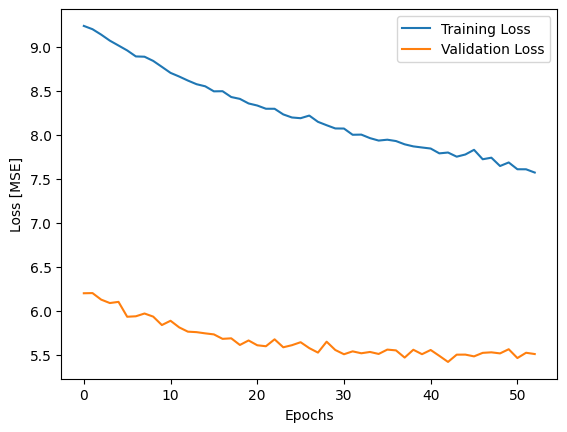

In [32]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])



plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss [MSE]')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")




3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MSE: 4.535042248303124
RMSE: 2.1295638634009366
MAE: 1.6009149599075319
R² Score: 0.9156529252819865


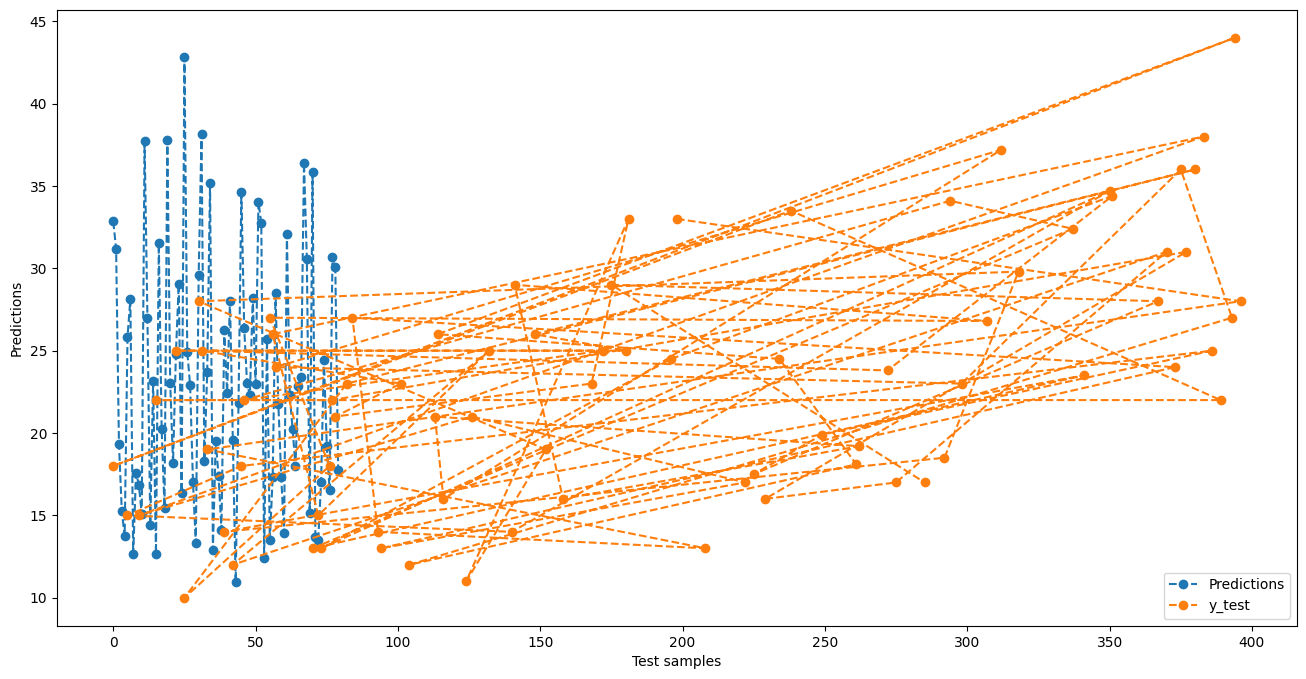

In [40]:
features = np.array([[]])
model.predict(features)

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/dense_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\hp\AppData\Local\Temp\ipykernel_24692\3998023900.py", line 2, in <module>

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 562, in predict

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 259, in one_step_on_data_distributed

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 249, in one_step_on_data

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in predict_step

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\layer.py", line 908, in __call__

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\sequential.py", line 213, in call

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py", line 182, in call

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py", line 637, in call

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\layer.py", line 908, in __call__

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py", line 148, in call

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations\activations.py", line 101, in static_call

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 15, in relu

Matrix size-incompatible: In[0]: [1,7], In[1]: [9,64]
	 [[{{node sequential_1/dense_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_8537]

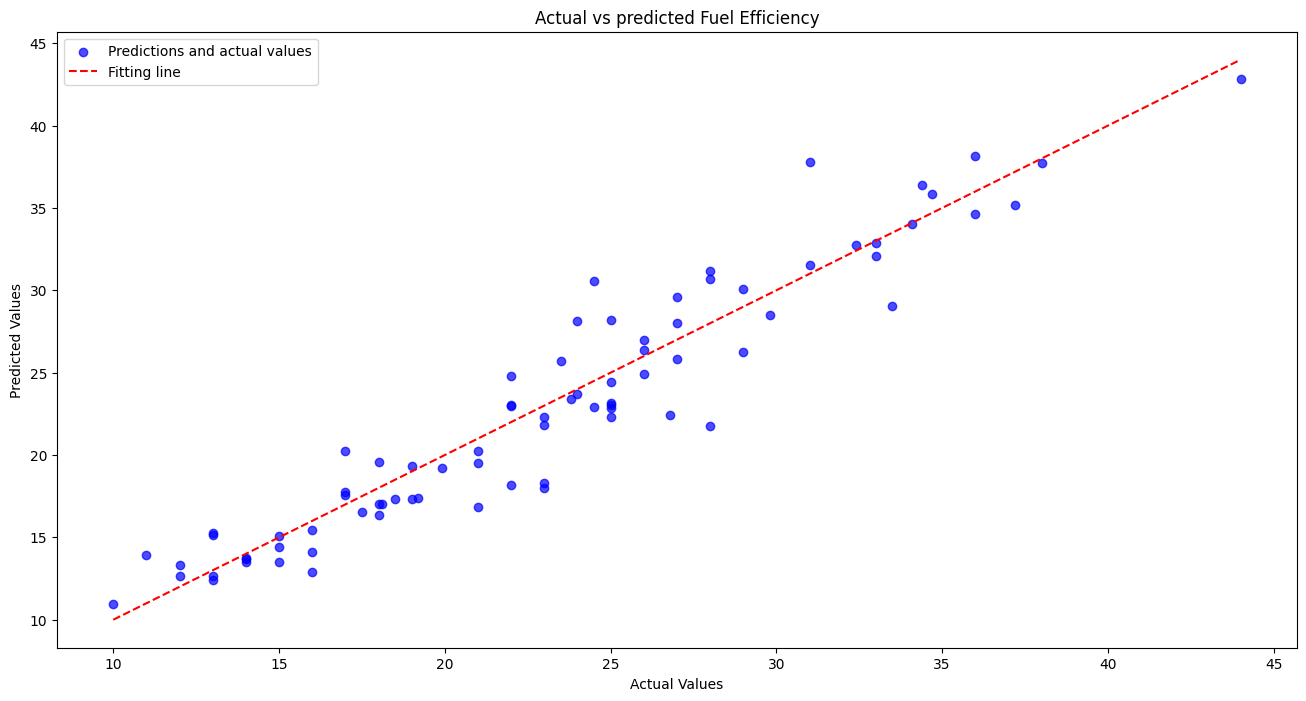

In [45]:
plt.figure(figsize = (16,8))
plt.scatter(y_test, Predictions,alpha = 0.7, label = 'Predictions and actual values', color = 'blue')
plt.plot([min(y_test), max(y_test)], [min(y_test),max(y_test) ], color  = 'red', label = 'Fitting line', linestyle = 'dashed')
plt.title('Actual vs predicted Fuel Efficiency')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()